In [99]:
import matplotlib.pyplot as plt
import datajoint as dj
import numpy as np
import seaborn as sns
import pandas as pd
from datetime import datetime


from DMS2_utils import *
from create_trials_df import create_trials_df_from_dj
from dj_utils import return_date_window, ANIMAL_IDS
from create_days_df import create_days_df_from_dj, lazy_load_days_summary_df
from plot_days_info import *


# settings
%load_ext autoreload
%autoreload 
dj.blob.use_32bit_dims = True # necessary for pd.blob read
sns.set_context("talk")


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [78]:
date_min, date_max = return_date_window(latest_date=None, n_days_back=20)

In [79]:
flex_date_min = (datetime.today()- timedelta(days=4)).strftime("%Y-%m-%d")
df = create_trials_df_from_dj(date_min=flex_date_min)

[2023-06-02 10:40:29,210][WARNING]: MySQL server has gone away. Reconnecting to the server.


fetched 5 sessions for R610 between 2023-05-29 and 2023-06-02
fetched 5 sessions for R611 between 2023-05-29 and 2023-06-02
fetched 5 sessions for R612 between 2023-05-29 and 2023-06-02
fetched 5 sessions for R613 between 2023-05-29 and 2023-06-02
fetched 5 sessions for R614 between 2023-05-29 and 2023-06-02


In [80]:
make_daily_stage_plots(df, overwrite=False)

plotting stage 3 / 4 plot R610 on 2023-06-02
plotting stage 3 / 4 plot R611 on 2023-06-02
plotting stage 3 / 4 plot R612 on 2023-06-02
plotting stage 3 / 4 plot R613 on 2023-06-02
plotting stage 3 / 4 plot R614 on 2023-06-02


In [85]:
date_min

'2023-05-13'

In [84]:
days_df = lazy_load_days_summary_df(
    date_min=date_min, 
    date_max=datetime.today().strftime("%Y-%m-%d"),
    save_out=True
)

partial dj load with new date max 2023-06-02 -> 2023-05-28
Returning appended df with entries between 2023-05-13 and 2023-06-02
Saved out appended df to c:\Users\JB\github\jbreda_animal_training\code\training_performance\days_df.csv


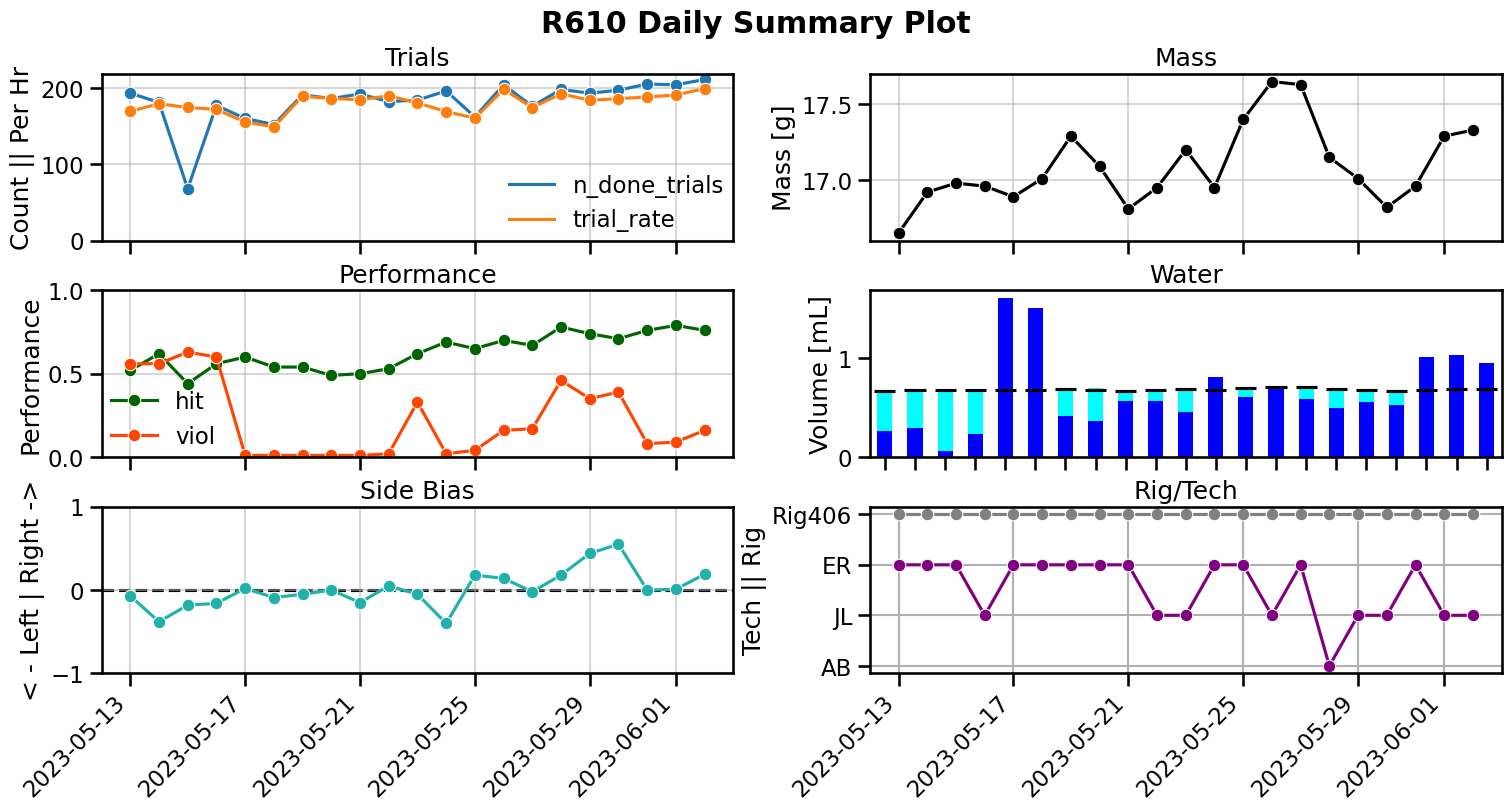

In [93]:
plot_multiday_summary('R610', days_df)

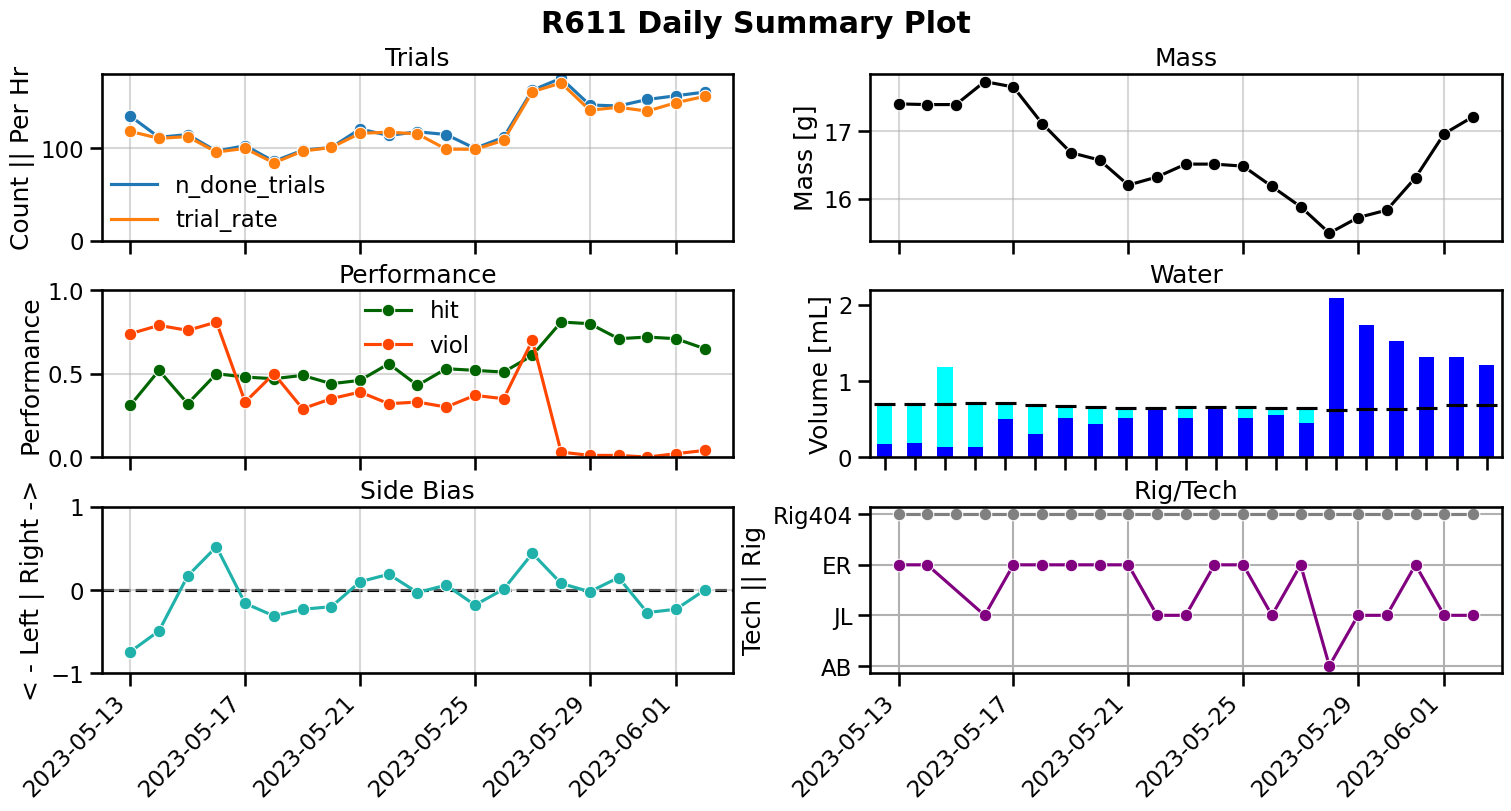

In [94]:
plot_multiday_summary('R611', days_df)

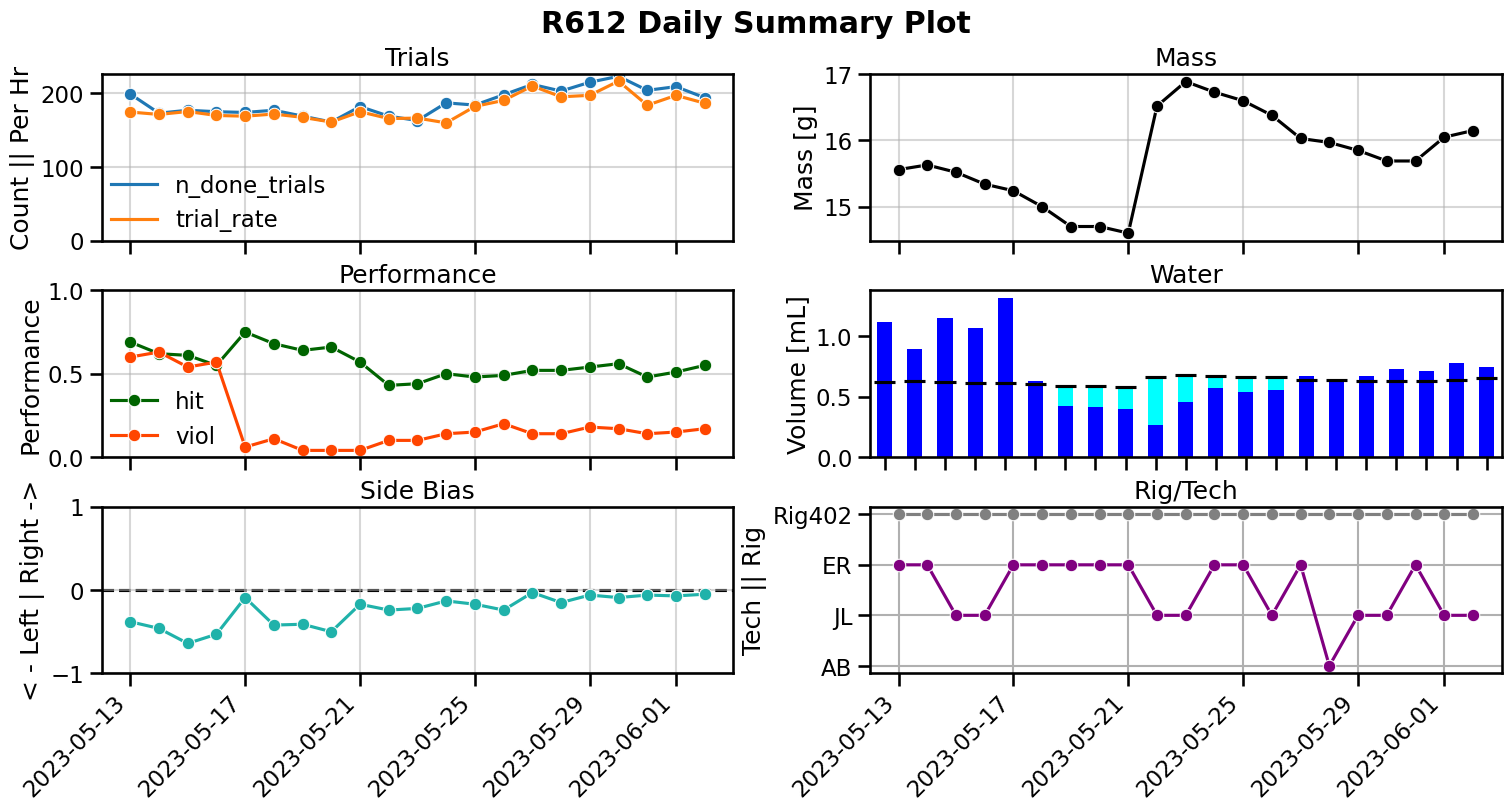

In [95]:
plot_multiday_summary('R612', days_df)

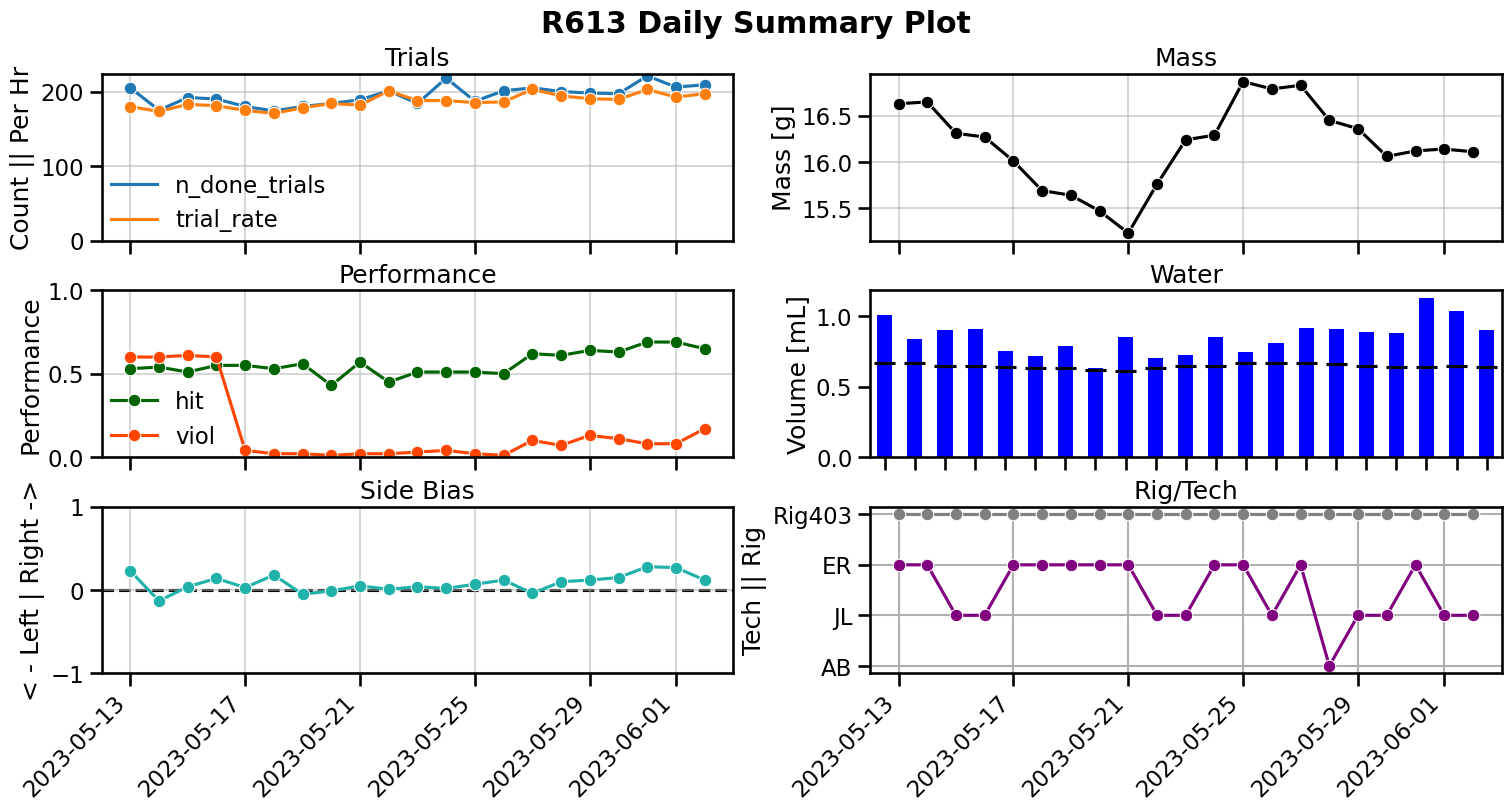

In [96]:
plot_multiday_summary('R613', days_df)

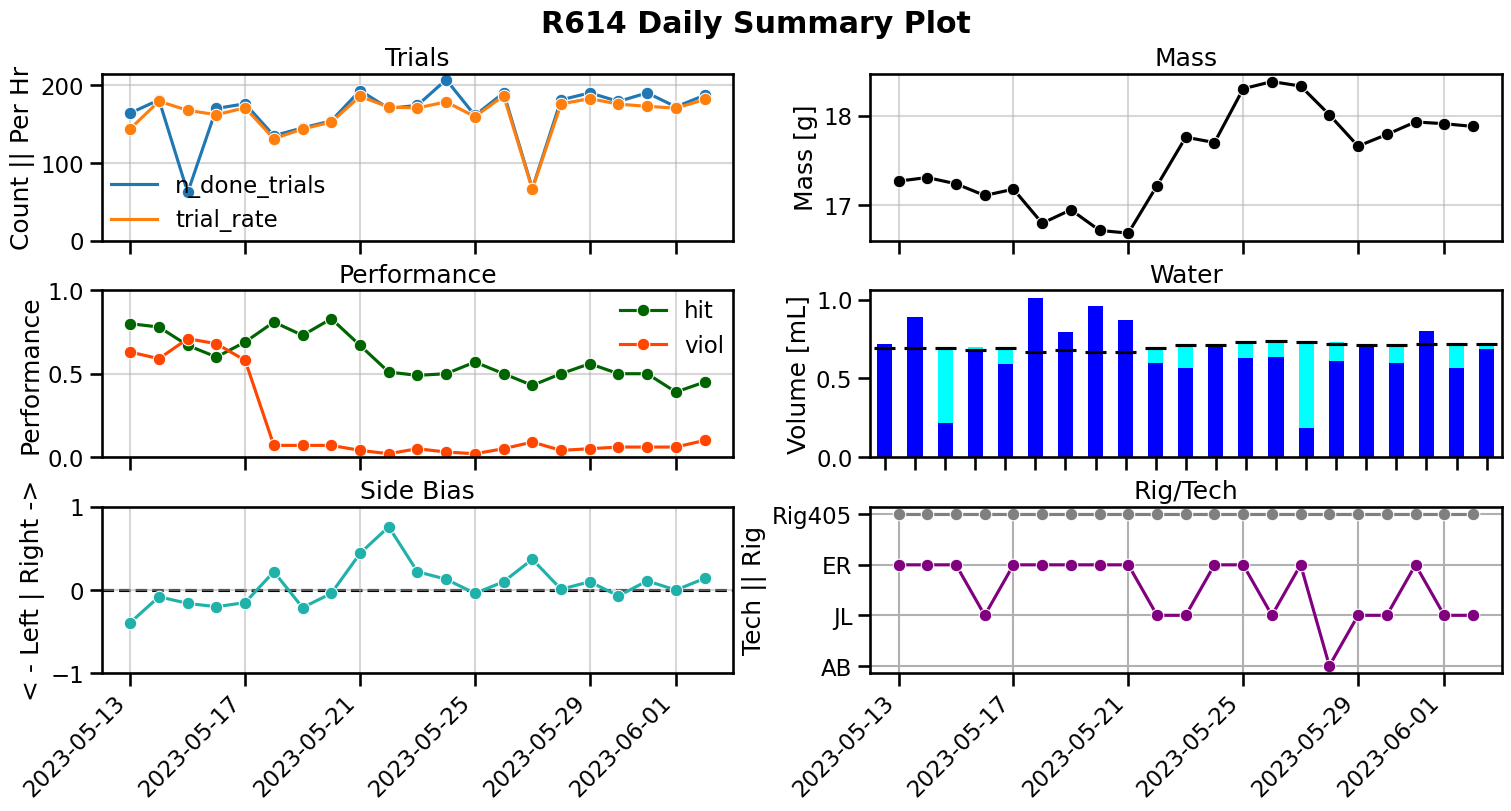

In [97]:
plot_multiday_summary('R614', days_df)

## DEV

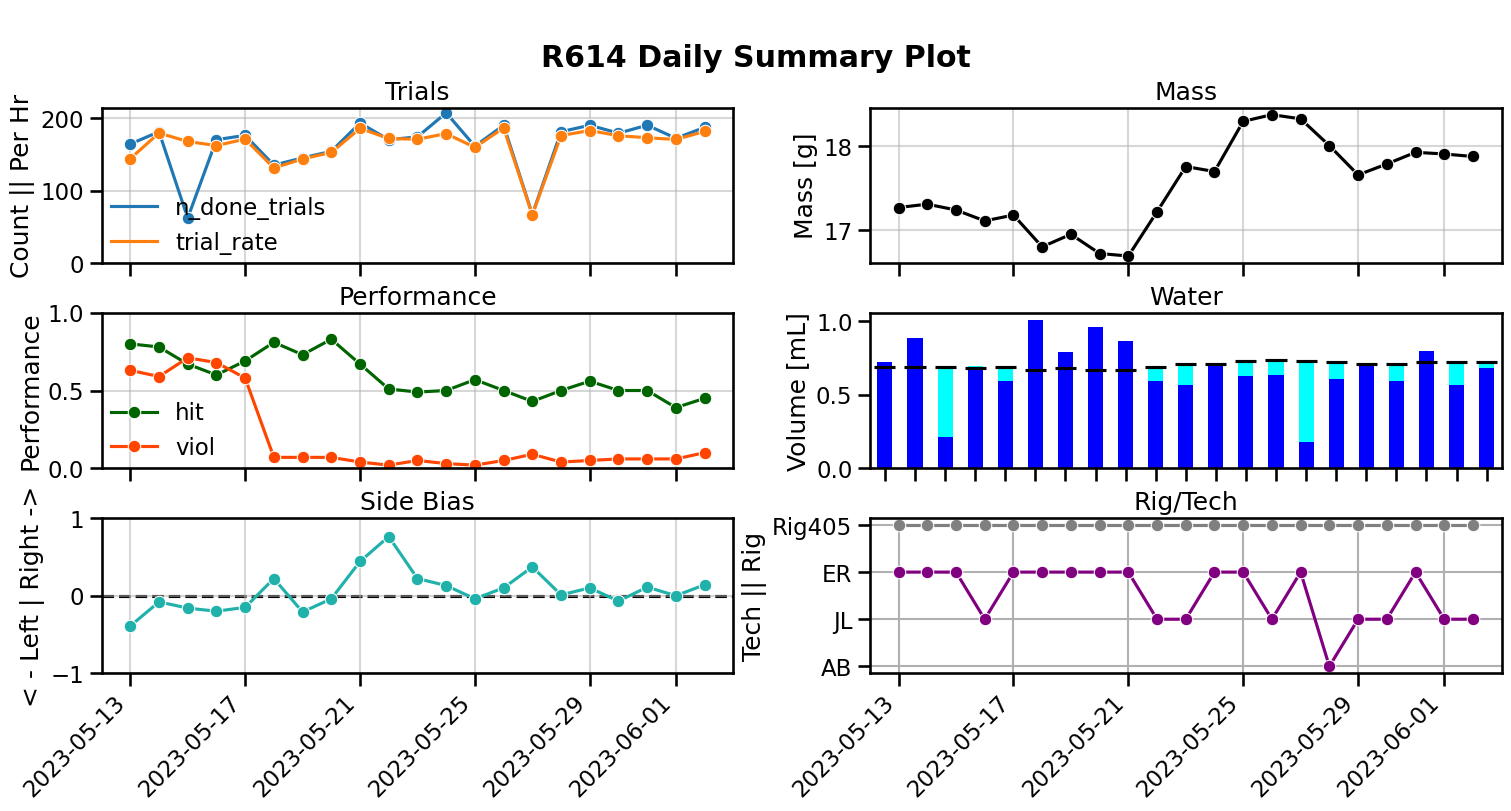

In [87]:

# for animal_id, animal_df in days_df.groupby('animal_id'):
#     None
# from plot_days_info import *
# ## Initialize mutli-axis figure
# layout = """
#     AAABBB
#     CCCDDD
#     EEEFFF
# """
# fig = plt.figure(constrained_layout=True, figsize=(15,8))
# ax_dict = fig.subplot_mosaic(layout)  # ax to plot to
# plt.suptitle(f"\nR614 Daily Summary Plot", fontweight="semibold")


# ## Plot
# # left column
# plot_trials(animal_df, ax_dict["A"], title="Trials", legend=True, xaxis_label=False)
# plot_performance(animal_df, ax_dict["C"], title="Performance", xaxis_label=False)
# plot_side_bias(animal_df, ax_dict["E"], title="Side Bias", xaxis_label=True)

# # right column
# plot_mass(animal_df, ax_dict["B"], title="Mass", xaxis_label=False)
# plot_water_restriction(animal_df, ax_dict["D"], title="Water", legend=False, xaxis_label=False)
# plot_rig_tech(animal_df, ax_dict["F"], title="Rig/Tech", xaxis_label=True)

# # plots to add
# # stage plot X
# # time to spoke (or cpoke eventually) *
# # delay dur X
# # trial result plot (stacked or unstacked option, unstacked might be better) X
# # antibias params X
# ## eventually!
# # sessions start time
# # pre go/ viol off X
# # settling, pre go, sa, delay, sb, post sb times across days X
    # add go cue dur if go is on?
# # give info, sma info, etc (maybe on oneof those dot plots)
# # 
# # stimulus information

